<a href="https://colab.research.google.com/github/Abhishekauti21/greyatomcodes/blob/master/Day14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
df1=pd.read_csv('test.csv')

In [32]:
df=pd.read_csv('train.csv')

In [16]:
df.shape

(418, 11)

In [17]:
df1.shape

(891, 12)

In [18]:
df
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)

NameError: ignored

In [27]:
df1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df1.isnull().sum()*100/len(df1)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [34]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [37]:
train_missing= missing_values_table(df)
train_missing


Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


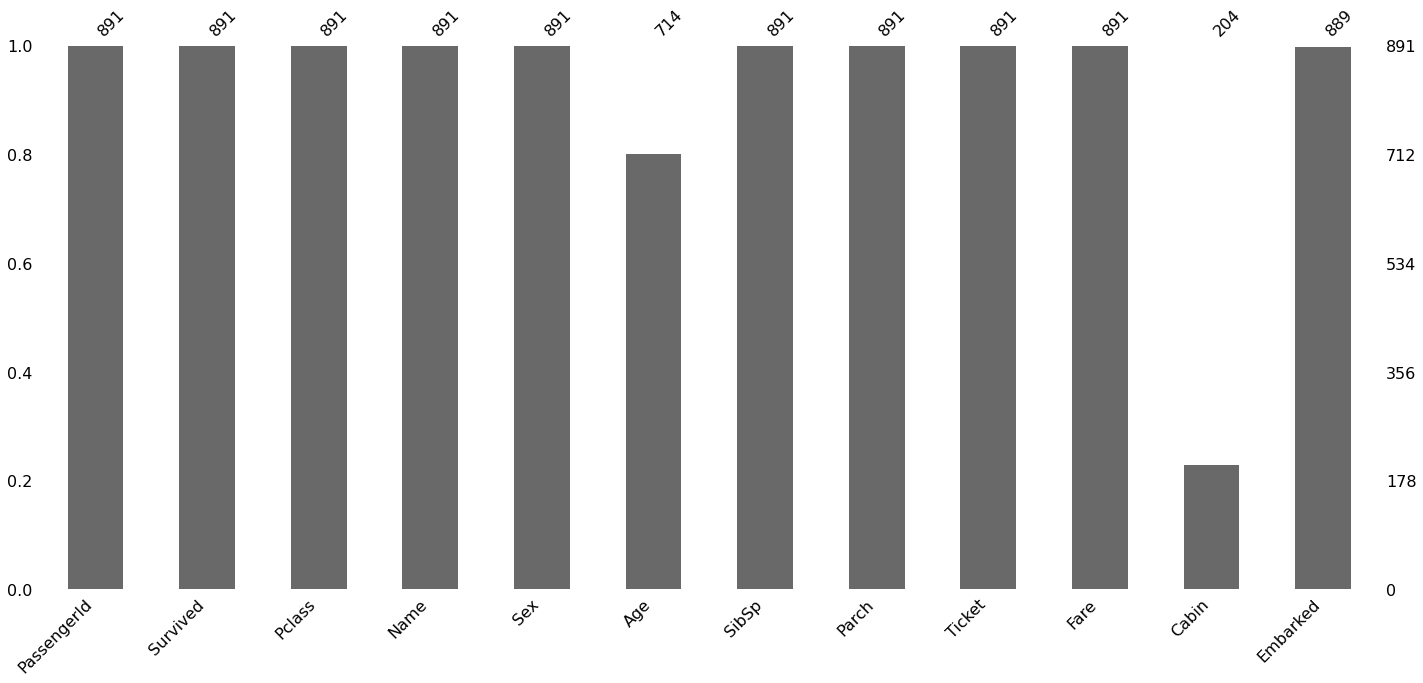

In [45]:
import missingno as mi
mi.bar(df)


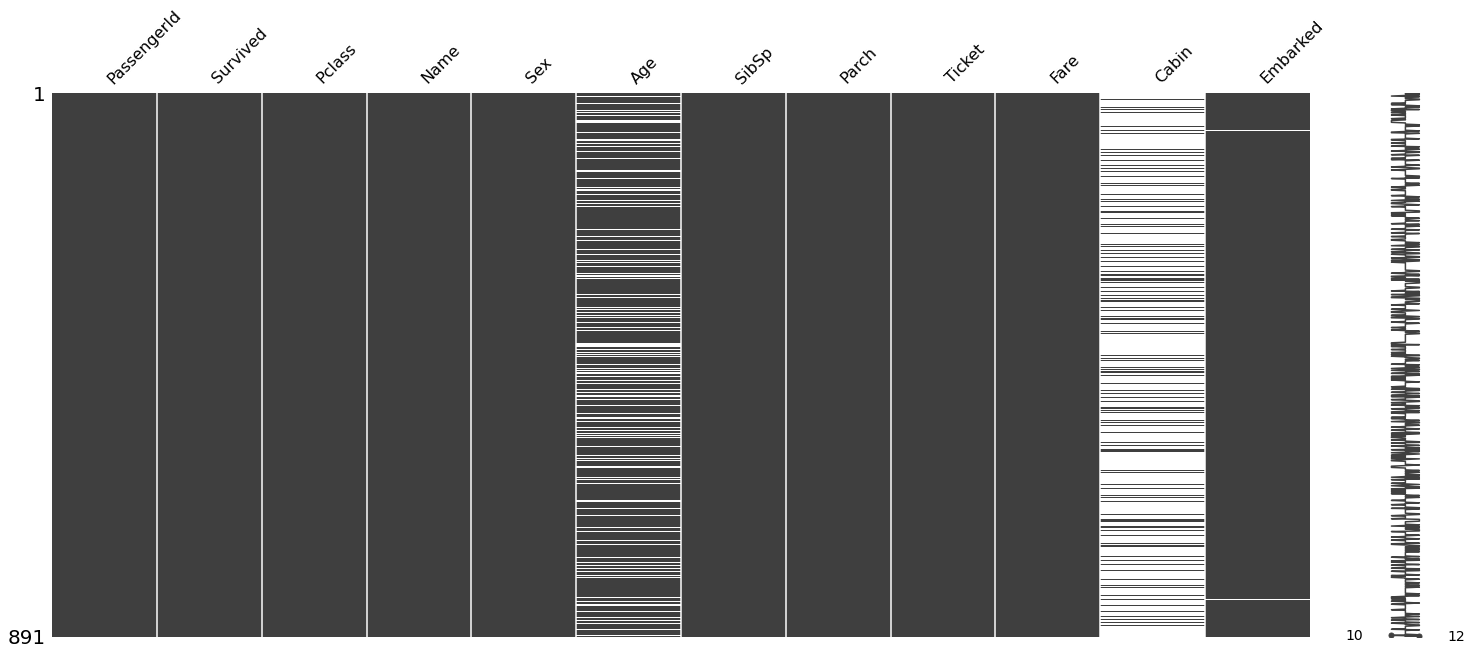

In [46]:
mi.matrix(df)

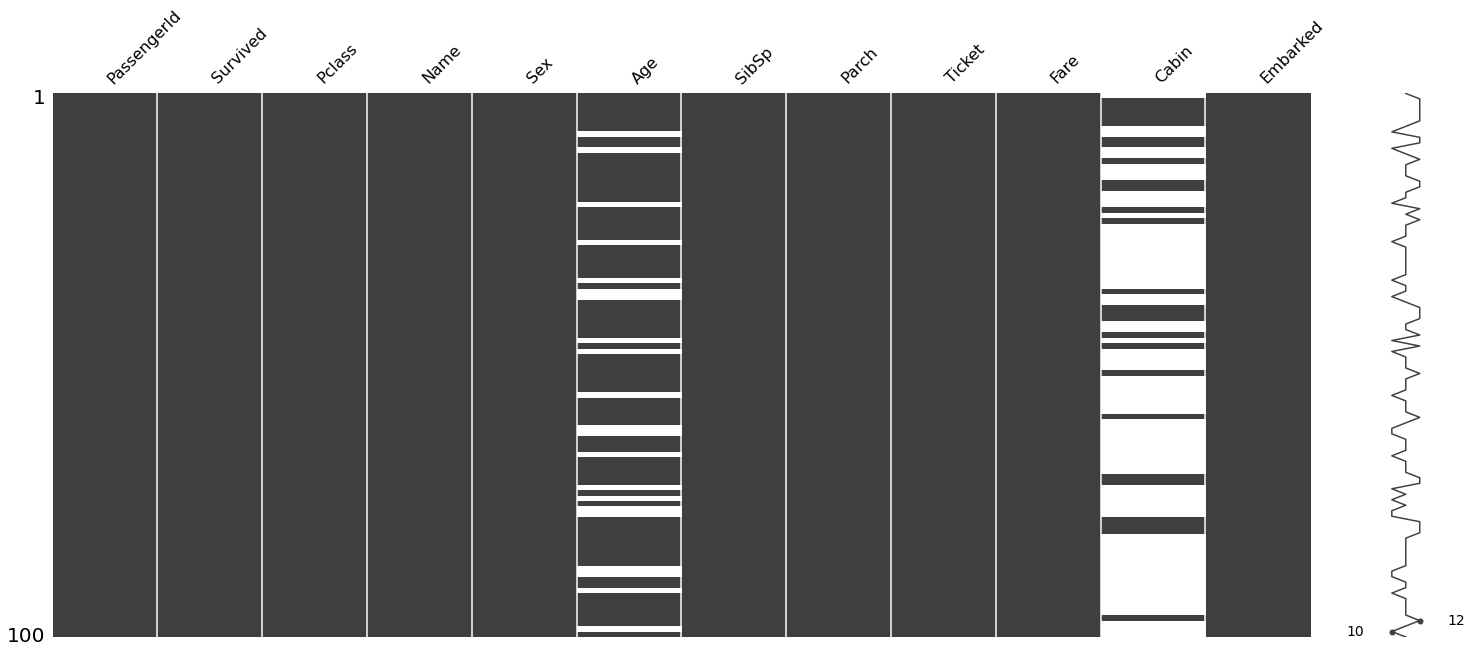

In [51]:
mi.matrix(df.sample(100))

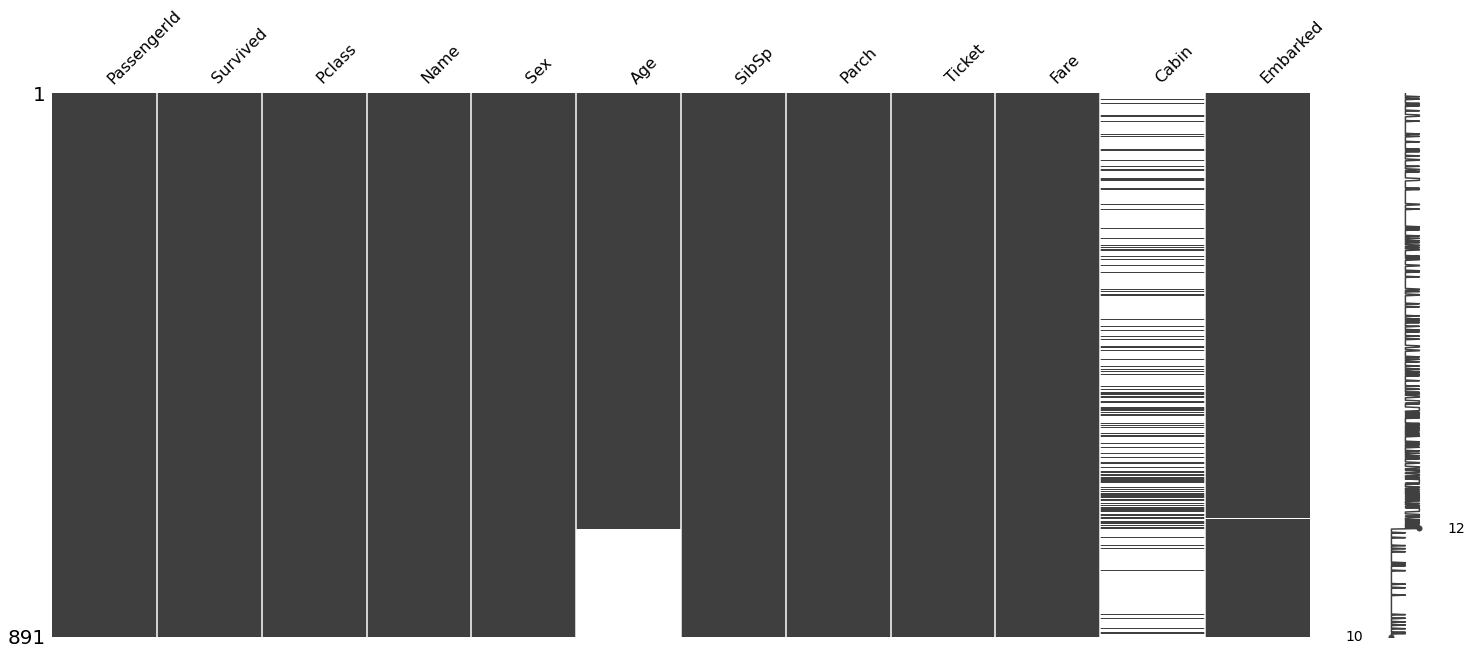

In [53]:
sorted = df.sort_values('Age')
mi.matrix(sorted)

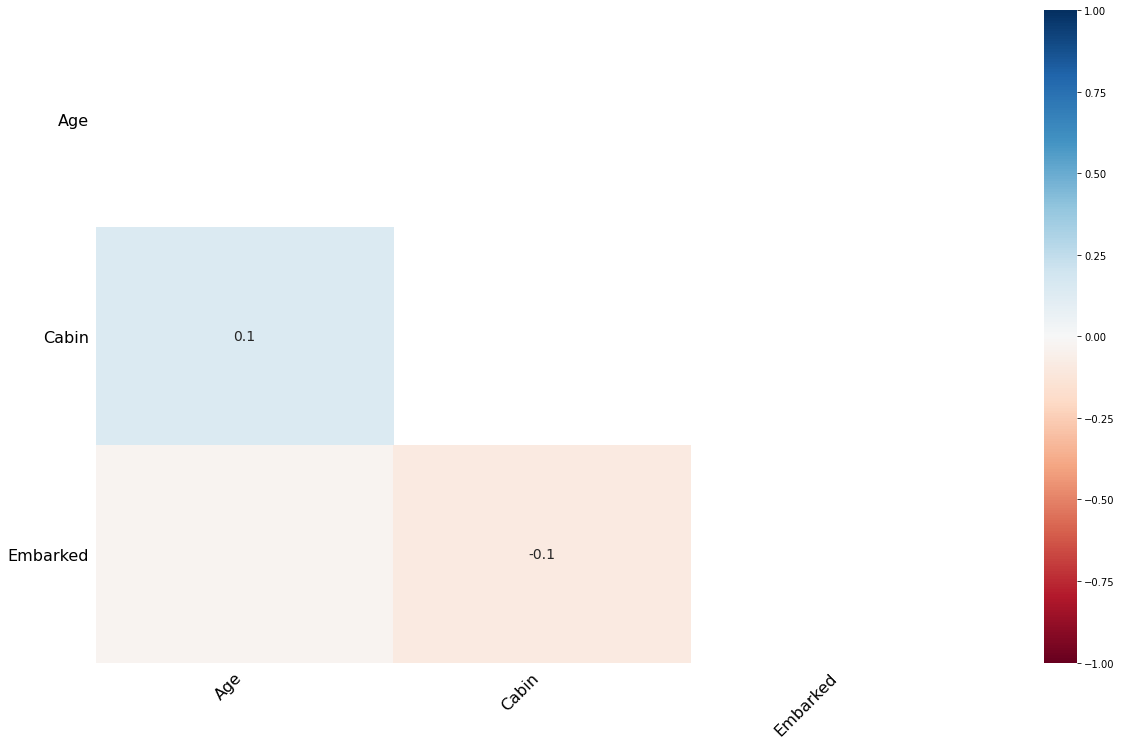

In [54]:
mi.heatmap(df)

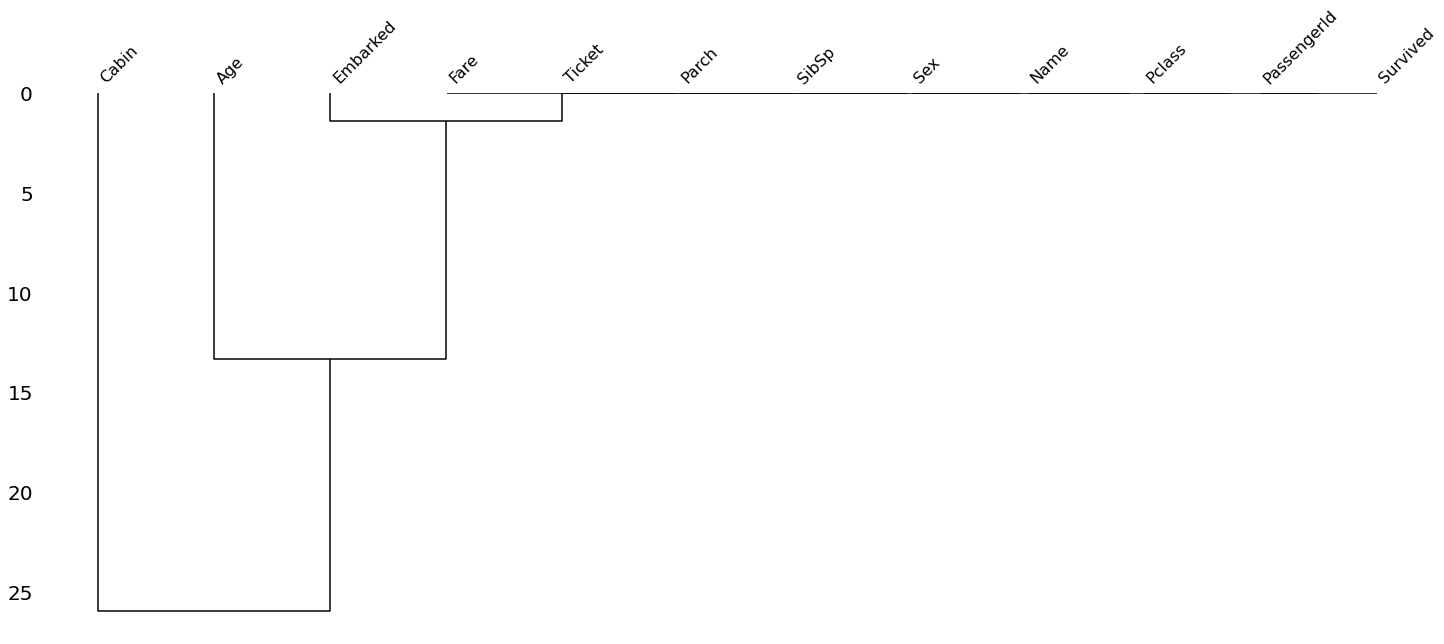

In [55]:
mi.dendrogram(df)

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
train_1 = df.copy()
train_1['Age'].mean() 


29.69911764705882

In [61]:
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()


0

In [62]:
train_2 = df.copy()

In [63]:
import numpy as np 
  
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer 
  
# Imputer object using the mean strategy and  
# missing_values type for imputation 
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
  
data = [[12, np.nan, 34], [10, 32, np.nan],  
        [np.nan, 11, 20]] 



In [64]:
print(data)

[[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [65]:
print("Original Data : \n", data) 
# Fitting the data to the imputer object 
imputer = imputer.fit(data) 
  
# Imputing the data      
data = imputer.transform(data) 
  
print("Imputed Data : \n", data)


Original Data : 
 [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]
Imputed Data : 
 [[12.  21.5 34. ]
 [10.  32.  27. ]
 [11.  11.  20. ]]


In [71]:
city_day = pd.read_csv('city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy(deep=True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [72]:
#Missing Values
city_day_missing= missing_values_table(city_day)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16807,64.1
PM10,10766,41.1
NH3,9847,37.6
Toluene,7555,28.8
Benzene,5287,20.2
PM2.5,4289,16.4
AQI,4282,16.3
AQI_Bucket,4282,16.3
NOx,4043,15.4
O3,3660,14.0


In [73]:
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [74]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

In [75]:
# Imputing AQI value

city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [76]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [77]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [78]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

In [81]:
df2=pd.read_csv('Automobile_data1.csv')

In [82]:
df2.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   make          205 non-null    object 
 2   fuel-type     205 non-null    object 
 3   body-style    205 non-null    object 
 4   drive-wheels  205 non-null    object 
 5   wheel-base    205 non-null    float64
 6   length        205 non-null    float64
 7   width         205 non-null    float64
 8   height        205 non-null    float64
 9   horsepower    205 non-null    int64  
 10  peak-rpm      205 non-null    int64  
 11  highway-mpg   205 non-null    int64  
 12  city-mpg      205 non-null    int64  
 13  price         205 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [84]:
df2.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


In [85]:
df2.isnull().sum()

symboling       0
make            0
fuel-type       0
body-style      0
drive-wheels    0
wheel-base      0
length          0
width           0
height          0
horsepower      0
peak-rpm        0
highway-mpg     0
city-mpg        0
price           0
dtype: int64

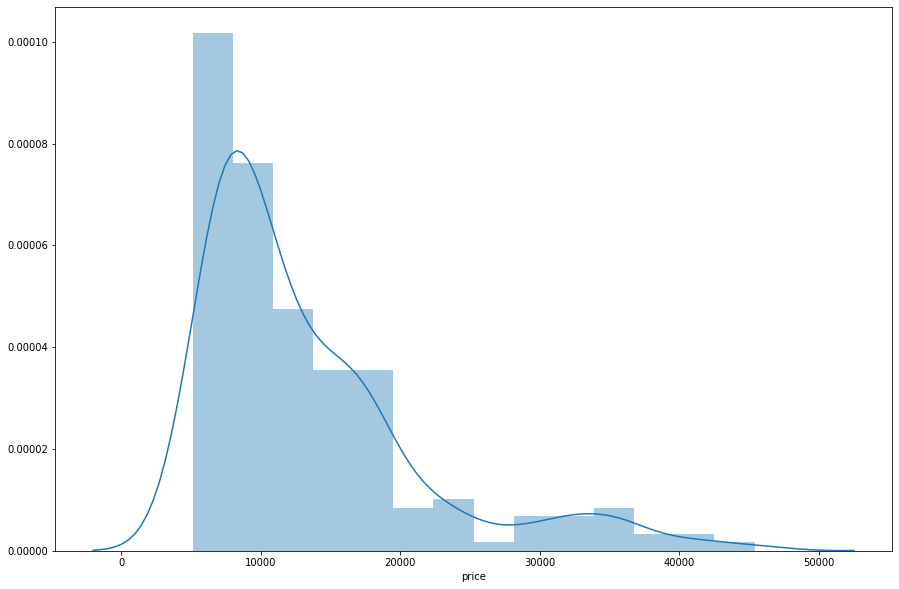

In [86]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df2['price'])

In [87]:
df2['price'].skew()

1.684325214046249

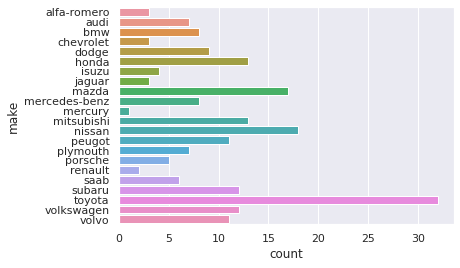

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
ax = sns.countplot(y='make',data=df2)

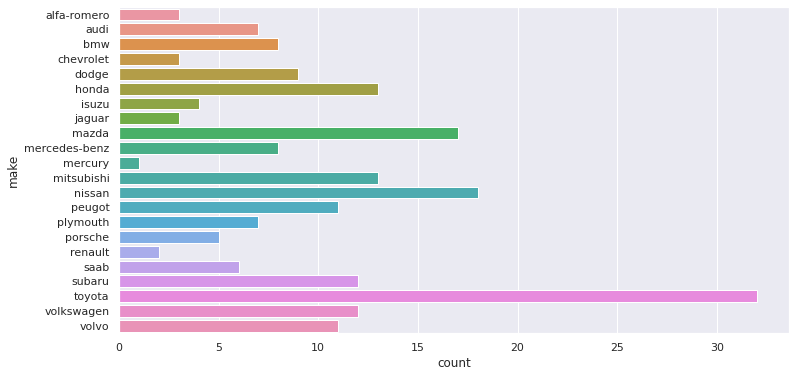

In [99]:
plt.figure(figsize=(12,6))
sns.countplot(y='make', data=df2)

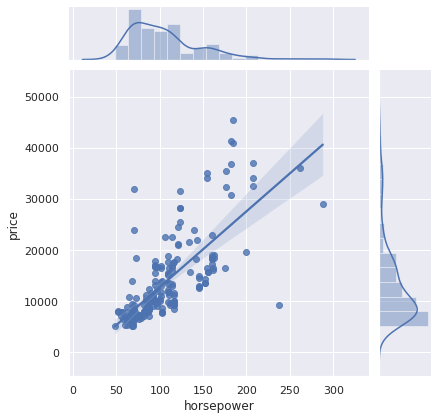

In [100]:
sns.jointplot('horsepower', 'price', data=df2, kind='reg')

In [ ]:
symboling, bins = np.histogram(df2)
plt.hist(bins[:-1], bins, symboling=counts)

Text(0.5, 1.0, 'Fuel-Type diagram')

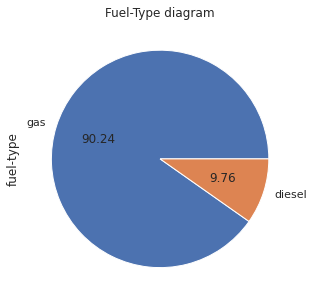

In [104]:
df2['fuel-type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Fuel-Type diagram')

In [106]:
df2.corr()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,0.059307,0.281768,0.034606,-0.035823,-0.085263
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.335078,-0.360603,-0.544082,-0.470414,0.553063
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.549450,-0.283484,-0.704662,-0.670909,0.639304
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.629631,-0.217609,-0.677218,-0.642704,0.721356
height,-0.541038,0.589435,0.491029,0.279210,1.000000,-0.098349,-0.322992,-0.107358,-0.048640,0.100939
horsepower,0.059307,0.335078,0.549450,0.629631,-0.098349,1.000000,0.123661,-0.749593,-0.787307,0.742846
peak-rpm,0.281768,-0.360603,-0.283484,-0.217609,-0.322992,0.123661,1.000000,-0.055025,-0.115900,-0.071707
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.749593,-0.055025,1.000000,0.971337,-0.649181
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.787307,-0.115900,0.971337,1.000000,-0.632671
price,-0.085263,0.553063,0.639304,0.721356,0.100939,0.742846,-0.071707,-0.649181,-0.632671,1.000000


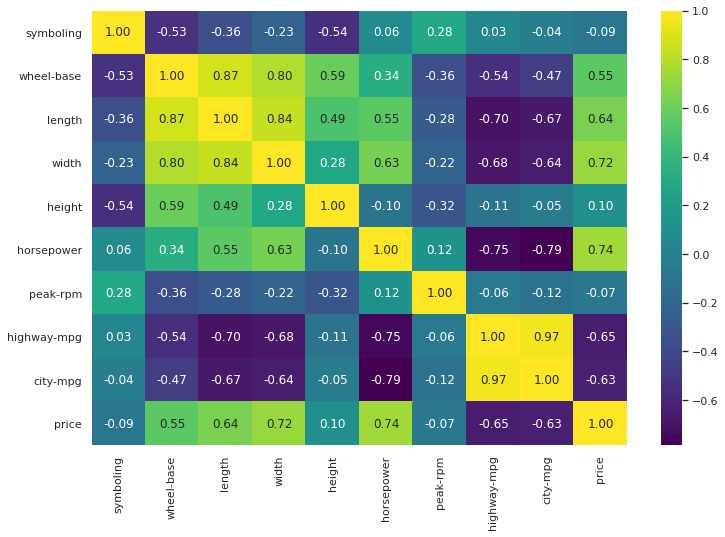

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), cmap='viridis',annot=True, fmt='.2f')

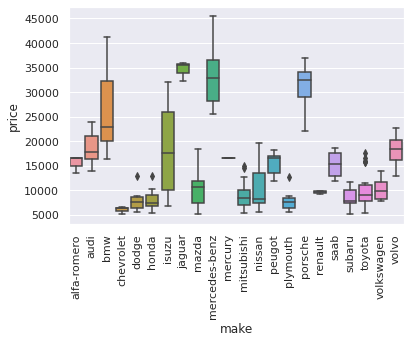

In [113]:
sns.boxplot(df2['make'],df2['price'])
plt.xticks(rotation=90)
plt.show()


In [114]:
df3=pd.read_csv('Automobile_data.csv')

In [115]:
df3.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [116]:
df3.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [117]:
df3.replace(to_replace="?",value=np.nan)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df3 = df3.replace("?","NaN")
numeric_imp = Imputer(missing_values="NaN",strategy='mean',axis=0)
df3['normalized-losses'] = numeric_imp.fit_transform(df3[['normalized-losses']])
df3['horsepower'] = numeric_imp.fit_transform(df3[['horsepower']])

ImportError: ignored

In [122]:
from sklearn. impute import SimpleImputer


In [125]:
numeric_imp = SimpleImputer(missing_values=np.nan,strategy='mean')
df3['normalized-losses'] = numeric_imp.fit_transform(df3[['normalized-losses']])
df3['horsepower'] = numeric_imp.fit_transform(df3[['horsepower']])


In [126]:
df3['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64